In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from src.evaluation import ResultsFromMeanStdDF

In [2]:
def load_csv_multidxs(path_csv, amount_idxs_cols, **kwargs):
    headers_idxs = pd.read_csv(path_csv, header=None, nrows=3, keep_default_na=False)

    headers = headers_idxs.iloc[:2,amount_idxs_cols:].values
    idxs_names = headers_idxs.iloc[2,:amount_idxs_cols].values.astype(str)


    df = pd.read_csv(path_csv, skiprows=3, header=None)
    df.set_index(list(range(amount_idxs_cols)), inplace=True)

    df.columns = pd.MultiIndex.from_arrays(headers)
    df.index.set_names(idxs_names, inplace=True)

    return df

In [3]:
notations = ['fragSMILES','t-SMILES','SELFIES','SMILES']
syntaxes = ['valid', 'unique', 'novel']
# metrics = ['FCD/Test','logP','SA','QED','weight']
metrics = ['FCD/Test','SA','QED',]
y_pos = list(range(len(notations)))
height = 0.8

edges = ['white','white','white','white']

In [4]:
from matplotlib.patches import Patch

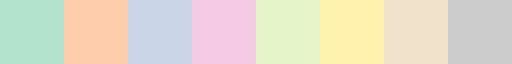

In [5]:
plt.get_cmap("Pastel2")

In [6]:
# colors = list(plt.get_cmap("tab10").colors)
colors = list(plt.get_cmap("Pastel2").colors)

legend = [
    Patch(facecolor=color, label=notation) for notation,color in zip(notations, colors)
] + [ Patch(facecolor='white', lw=2, edgecolor='black', label='best of') ]

In [7]:
syntax_conversion = {'valid':'Validity', 'unique':'Uniqueness','novel':'Novelty', 'invalid':'Invalidity'}
def plot_syntax(ax, syntax, df_values, df_significant):
    values = df_values.loc[notations,(syntax,'mean')]
    errors = df_values.loc[notations,(syntax,'std')]
    
    best_notation = values.idxmax(axis=0)[0] if syntax != 'invalid' else values.idxmin(axis=0)[0]
    best_idx = notations.index(best_notation)
    edges_colors = edges.copy()
    edges_colors[best_idx]='black'

    ax.barh(y_pos, values, height, label=notations, color=colors, ec=edges_colors, lw=1, xerr=errors)
    ax.set_ylabel(syntax_conversion[syntax], rotation=90)
    ax.set_xlabel('molecules')

    significants = df_significant.loc[notations[1:], syntax]
    significants_ticks = np.where(significants, '✓', '✘')
    significants_colors = np.where(significants, 'g', 'r')

    ax.yaxis.set_ticks_position('right')
    ax.set_yticks(y_pos[1:], significants_ticks)

    for ytick, color in zip(ax.get_yticklabels(), significants_colors):
        ytick.set_color(color)

    percent_values = df_values.loc[notations,(syntax+'%','mean')]
    x_mean = ax.get_xlim()[1] / 2
    for bar, percent in zip(ax.patches, percent_values):
        ax.text(x_mean, bar.get_y()+height/3, f'{percent*100:.1f} %', color = 'black', 
        ha = 'center', va = 'center', fontsize=7) 

In [8]:
def plot_metric(ax, metric, df_values, df_significant):
    values = df_values.loc[notations,(metric,'mean')]
    errors = df_values.loc[notations,(metric,'std')]

    best_notation = values.idxmin(axis=0)[0]
    best_idx = notations.index(best_notation)
    edges_colors = edges.copy()
    edges_colors[best_idx]='black'

    ax.barh(y_pos, values, height, label=notations, color=colors, ec=edges_colors, lw=1, xerr=errors)
    if metric == 'FCD/Test':
        ax.set_ylabel(metric.rstrip('/Test'), rotation=90)
        ax.set_xlabel('Distance')
    else:
        ax.set_ylabel('Δ ' + metric, rotation=90)
        ax.set_xlabel('Wasserstein-1 distance')

    significants = df_significant.loc[notations[1:], metric]
    significants_ticks = np.where(significants, '✓', '✘')
    significants_colors = np.where(significants, 'g', 'r')

    ax.yaxis.set_ticks_position('right')
    ax.set_yticks(y_pos[1:], significants_ticks)

    for ytick, color in zip(ax.get_yticklabels(), significants_colors):
        ytick.set_color(color)

## Moses datset figures

In [9]:
moses_query = ' hl==3 and hu==256 and bs==512 '

df_syntax = load_csv_multidxs('results/06_mosesSyntax.csv', 5)
df_syntax = df_syntax.query(moses_query)
df_syntax_sign = pd.read_csv('results/06_mosesSyntax_significant05.csv', index_col=0)

df_novels = load_csv_multidxs('results/06_mosesNovelMetrics.csv', 5)
df_novels = df_novels.query(moses_query)
df_novels_sign = pd.read_csv('results/06_mosesNovelMetrics_significant05.csv', index_col=0)

In [10]:
ResultsFromMeanStdDF(df_syntax, df_syntax_sign).to_csv('SI_tables/moses_syntax.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:58: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

In [11]:
ResultsFromMeanStdDF(df_novels, df_novels_sign).to_csv('SI_tables/moses_novels.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

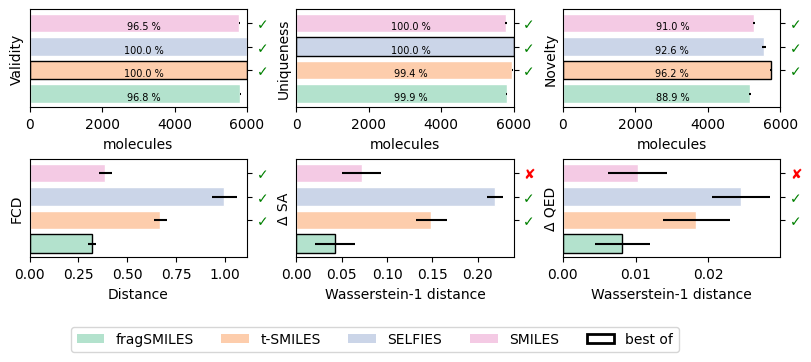

In [12]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(8,3),constrained_layout=True)

for ax, syntax in zip(axes[0,:], syntaxes):
    plot_syntax(ax, syntax, df_values=df_syntax, df_significant=df_syntax_sign)
    ax.set_xlim(0,6000)

for ax, metric in zip(axes[1,:], metrics):
    plot_metric(ax, metric, df_values=df_novels, df_significant=df_novels_sign)

fig.legend(handles=legend,
           bbox_to_anchor=(.85,-0.05),
           ncol=len(notations)+1
           )

## Chembl dataset figures

In [38]:
chembl_query_1 = ' aug==1 and hl==2 and hu==512 and bs==512 '
chembl_query_5 = ' aug==5 and hl==2 and hu==512 and bs==256  '

sign_notations = [notation for notation in notations if notation !='fragSMILES']

df_syntax = load_csv_multidxs('results/07_chemblSyntax.csv', 6)
df_syntax_1 = df_syntax.query(chembl_query_1)
df_syntax_1.index = df_syntax_1.index.droplevel(0)
df_syntax_5 = df_syntax.query(chembl_query_5)
df_syntax_5.index = df_syntax_5.index.droplevel(0)

df_syntax_sign = pd.read_csv('results/07_chemblSyntax_significant05.csv', index_col=0)
df_syntax_sign_1 = df_syntax_sign.loc[ [notation+'x1' for notation in sign_notations] ]
df_syntax_sign_1.index = sign_notations
df_syntax_sign_5 = df_syntax_sign.loc[ [notation+'x5' for notation in sign_notations] ]
df_syntax_sign_5.index = sign_notations

df_novels = load_csv_multidxs('results/07_chemblNovelMetrics.csv', 6)
df_novels_1 = df_novels.query(chembl_query_1)
df_novels_1.index = df_novels_1.index.droplevel(0)
df_novels_5 = df_novels.query(chembl_query_5)
df_novels_5.index = df_novels_5.index.droplevel(0)

df_novels_sign = pd.read_csv('results/07_chemblNovelMetrics_significant05.csv', index_col=0)
df_novels_sign_1 = df_novels_sign.loc[ [notation+'x1' for notation in sign_notations] ]
df_novels_sign_1.index = sign_notations
df_novels_sign_5 = df_novels_sign.loc[ [notation+'x5' for notation in sign_notations] ]
df_novels_sign_5.index = sign_notations

In [39]:
ResultsFromMeanStdDF(df_syntax_1, df_syntax_sign_1).to_csv('SI_tables/chembl_syntax.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:58: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

In [40]:
ResultsFromMeanStdDF(df_novels_1, df_novels_sign_1).to_csv('SI_tables/chembl_novels.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

In [41]:
ResultsFromMeanStdDF(df_syntax_5, df_syntax_sign_5).to_csv('SI_tables/chembl_syntax_aug5.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:58: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

In [42]:
ResultsFromMeanStdDF(df_novels_5, df_novels_sign_5).to_csv('SI_tables/chembl_novels_aug5.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Y

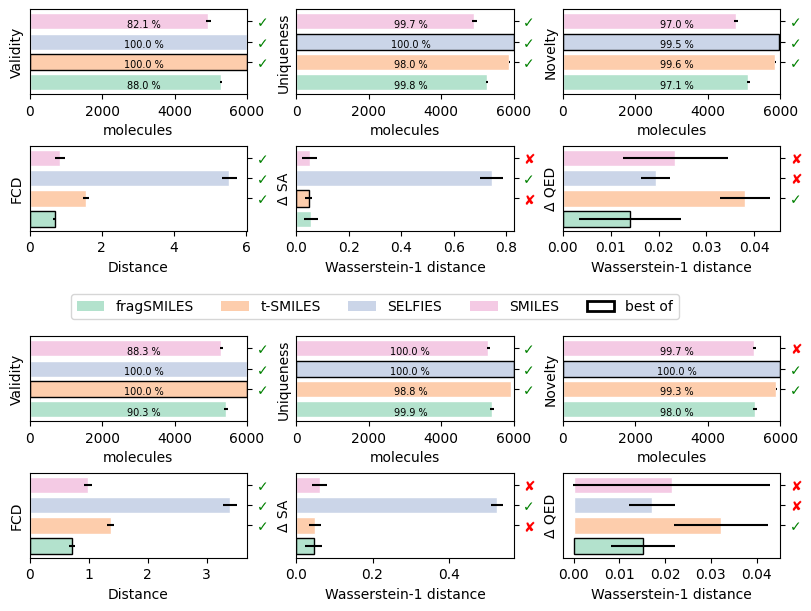

In [43]:
fig = plt.figure(layout='constrained', figsize=(8,6))
subfig1,subfig2 = fig.subfigures(2,1, hspace=0.18)
axes1 = subfig1.subplots(nrows=2, ncols=3)
axes2 = subfig2.subplots(nrows=2, ncols=3)

for ax, syntax in zip(axes1[0,:], syntaxes):
    plot_syntax(ax, syntax, df_values=df_syntax_1, df_significant=df_syntax_sign_1)
    ax.set_xlim(0,6000)

for ax, metric in zip(axes1[1,:], metrics):
    plot_metric(ax, metric, df_values=df_novels_1, df_significant=df_novels_sign_1)

for ax, syntax in zip(axes2[0,:], syntaxes):
    plot_syntax(ax, syntax, df_values=df_syntax_5, df_significant=df_syntax_sign_5)
    ax.set_xlim(0,6000)

for ax, metric in zip(axes2[1,:], metrics):
    plot_metric(ax, metric, df_values=df_novels_5, df_significant=df_novels_sign_5)

fig.legend(handles=legend,
           bbox_to_anchor=(.85,.53),
           ncol=len(notations)+1
           )

## chiral chembl

In [44]:
df_syntax = load_csv_multidxs('results/07_chemblChirals.csv', 6)
df_syntax_1 = df_syntax.query(chembl_query_1)
df_syntax_1.index = df_syntax_1.index.droplevel(0)
df_syntax_5 = df_syntax.query(chembl_query_5)
df_syntax_5.index = df_syntax_5.index.droplevel(0)

df_syntax_sign = pd.read_csv('results/07_chemblChirals_significant05.csv', index_col=0)
df_syntax_sign_1 = df_syntax_sign.loc[ [notation+'x1' for notation in sign_notations] ]
df_syntax_sign_1.index = sign_notations
df_syntax_sign_5 = df_syntax_sign.loc[ [notation+'x5' for notation in sign_notations] ]
df_syntax_sign_5.index = sign_notations

In [45]:
ResultsFromMeanStdDF(df_syntax_1, df_syntax_sign_1).to_csv('SI_tables/chembl_chirals.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [46]:
ResultsFromMeanStdDF(df_syntax_5, df_syntax_sign_5).to_csv('SI_tables/chembl_chirals_aug5.csv',mode='a')

/home/tox/fragsmiles/src/evaluation.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  newdf.xs(notation)[name] += '*'
/home/tox/fragsmiles/src/evaluation.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

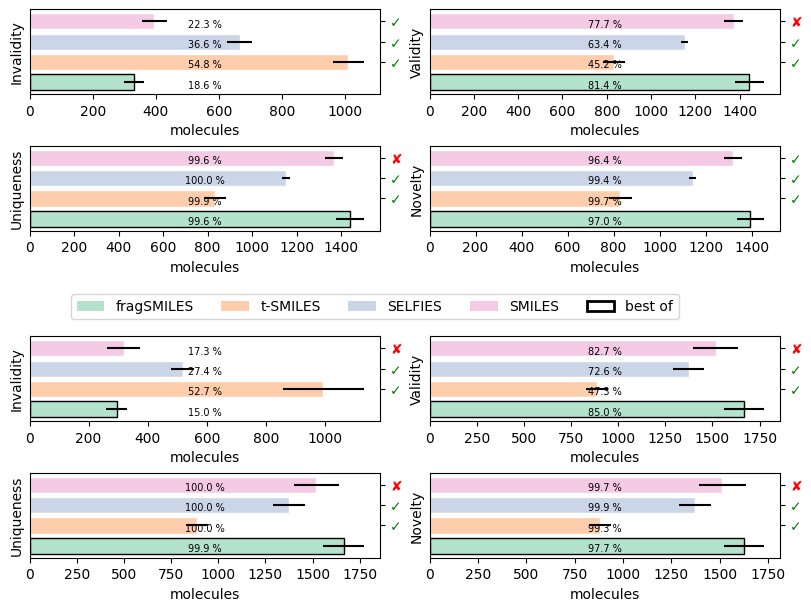

In [47]:
fig = plt.figure(layout='constrained', figsize=(8,6))
subfig1,subfig2 = fig.subfigures(2,1, hspace=0.18)
axes1 = subfig1.subplots(nrows=2, ncols=2)
axes2 = subfig2.subplots(nrows=2, ncols=2)

for ax, syntax in zip(axes1.flatten(), ['invalid']+syntaxes):
    plot_syntax(ax, syntax, df_values=df_syntax_1, df_significant=df_syntax_sign_1)

for ax, syntax in zip(axes2.flatten(), ['invalid']+syntaxes):
    plot_syntax(ax, syntax, df_values=df_syntax_5, df_significant=df_syntax_sign_5)


fig.legend(handles=legend,
           bbox_to_anchor=(.85,.53),
           ncol=len(notations)+1
           )

In [48]:
fig.savefig("figures/10_metricChiralChembl.pdf", bbox_inches='tight', dpi = 200)
fig.savefig("figures/10_metricChiralChembl.png", bbox_inches='tight', dpi = 200)